# Contents

- [Problem Statement](#problem)
- [Importing Libraries](#import)
- [Reading Data](#reading_data)
- [Data Understanding](#data_understanding)
- [Data Cleaning](#data_clean)
- [Data Analysis](#data_analysis)
- [Data Preparation](#data_prep)
- [Model Building](#build_model)
- [Model Validation](#validate_model)


## <a name='problem'>Problem Statement</a>

- A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- The company wants to know:
  - Which variables are significant in predicting the price of a house, and
  - How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

## <a name="import">Importing Libraries</a>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## <a name="reading_data">Reading Data</a>

In [3]:
infile_path = '/content/drive/MyDrive/Learnings/Case_Studies/Surprise_Housing/train.csv'
prices_df = pd.read_csv(infile_path, index_col=['Id'], na_filter=False)

### Viewing Top 5 rows

In [4]:
prices_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### Viewing Last 5 rows

In [5]:
prices_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125
1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2008,WD,Normal,147500


## <a name="data_understanding">Data Understanding</a>

#### Viewing all columns information

In [6]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [7]:
nrows, ncols = prices_df.shape
print(f'Number of houses for sale : {nrows}')
print(f'Number of parameters considered: {ncols-1}')

col_names = prices_df.columns
print(f'Identified target variable : {col_names[-1]}')

Number of houses for sale : 1460
Number of parameters considered: 79
Identified target variable : SalePrice


#### Observations
- Column **SalePrice** is identified as target variable.
- Values in **SalePrice** are of integer type.
- No Null values found in column **SalePrice**

## <a name="data_clean">Data Cleaning</a>

### Identifying duplicate rows

In [8]:
# Checking for the presence of any duplicate rows
print(f'No. of duplicate rows: {prices_df.duplicated().sum()}')

No. of duplicate rows: 0


In [9]:
# Checking if duplicate indexes are present
print(f"No. of duplicate housing ID's : {prices_df.index.duplicated().sum()}")

No. of duplicate housing ID's : 0


### Identifying columns with NA and similar values

In [10]:
# Defining a function to deterimine 'NA' and similar values in prices_df dataframe
def get_na_values(s):
  na_values = ['NA', 'Na', 'na', 
               'None', 'NONE', 'none',
               '?', 'NO', 'No', 'no',
               '-', '', ' ', 
               'Null', 'NULL', 'null',
               'Nan', 'NAN', 'nan']
  s_bool = s.isin(na_values)
  if any(s_bool):
    return s.loc[s_bool].unique().tolist()
  else:
    return []

In [11]:
# Listing the columns with 'NA' and similar values 
na_df = pd.DataFrame()
for col in prices_df.select_dtypes(include=['O']).columns:
  na_values = get_na_values(prices_df[col])
  row = pd.DataFrame({'Column':col, 'No_of_NA_types':len(na_values), 'NA_type_values': ','.join(na_values)}, index=['0'])
  na_df = pd.concat([na_df, row], ignore_index=True)

na_df.loc[na_df['No_of_NA_types']>0].reset_index(drop=True)

,Column,No_of_NA_types,NA_type_values
0,LotFrontage,1,NA
1,Alley,1,NA
2,MasVnrType,2,"None,NA"
3,MasVnrArea,1,NA
4,BsmtQual,1,NA
5,BsmtCond,1,NA
6,BsmtExposure,2,"No,NA"
7,BsmtFinType1,1,NA
8,BsmtFinType2,1,NA
9,Electrical,1,NA


#### Observations
- There are 19 columns which are expected to contain 'NA' or similar values.
- As per the data dictionary, 
  - **NA** in the following fields does not represent missing values. 
    - Alley
    - BsmtQual,
    - BsmtCond,
    - BsmtExposure,
    - BsmtFinType1,
    - BsmtFinType2,
    - FireplaceQu,
    - GarageType,
    - GarageFinish,
    - GarageQual,
    - GarageCond,
    - PoolQC,
    - Fence,
    - MiscFeature
  - **None** in the following fields does not represent missing values.
    - MasVnrType
  - **No** in the following fields does not represent missing values.
    - BsmtExposure
  - Hence the values 'NA', 'None' and 'No' can be replaced with some other names.

- As per the data dictionary, "NA" values in the following fields represent missing values.
  - LotFrontage,
  - MasVnrType,
  - MasVnrArea,
  - Electrical,
  - GarageYrBlt

### Replacing 'NA', 'None', and 'No' categories

In [12]:
# Mapping 'NA', 'None' and 'No values in below columns to approriate names
na_mapping={'Alley':{'NA':'NoAlley'},
             'MasVnrType':{'None':'NoVeneer'},
             'BsmtQual':{'NA':'NoBsmt'},
             'BsmtCond':{'NA':'NoBsmt'},
             'BsmtExposure':{'NA':'NoBsmt', 'No':'NoExp'},
             'BsmtFinType1':{'NA':'NoBsmt'},
             'BsmtFinType2':{'NA':'NoBsmt'},
             'FireplaceQu':{'NA':'NoFire'},
             'GarageType':{'NA':'NoGarage'},
             'GarageFinish':{'NA':'NoGarage'},
             'GarageQual':{'NA':'NoGarage'},
             'GarageCond':{'NA':'NoGarage'},
             'PoolQC':{'NA':'NoPool'},
             'Fence':{'NA':'NoFence'},
             'MiscFeature':{'NA':'NoMisc'}
             }

prices_df=prices_df.replace(na_mapping)

### Identifying columns with missing values

In [13]:
# Listing again the columns with 'NA' and similar values 
na_df = pd.DataFrame()
for col in prices_df.select_dtypes(include=['O']).columns:
  na_values = get_na_values(prices_df[col])
  row = pd.DataFrame({'Column':col, 'No_of_NA_types':len(na_values), 'NA_type_values': ','.join(na_values)}, index=['0'])
  na_df = pd.concat([na_df, row], ignore_index=True)

na_df.loc[na_df['No_of_NA_types']>0].reset_index(drop=True)

,Column,No_of_NA_types,NA_type_values
0,LotFrontage,1,NA
1,MasVnrType,1,NA
2,MasVnrArea,1,NA
3,Electrical,1,NA
4,GarageYrBlt,1,NA


In [14]:
# Determinig number of missing values and their percentage in above identified 5 columns
missing_count_df = (prices_df=='NA').sum()
missing_count_df = missing_count_df.loc[missing_count_df>0].to_frame(name='MissingCount')
missing_count_df['MissingPerct'] = round((missing_count_df['MissingCount']/nrows)*100, 4)
missing_count_df

,MissingCount,MissingPerct
LotFrontage,259,17.7397
MasVnrType,8,0.5479
MasVnrArea,8,0.5479
Electrical,1,0.0685
GarageYrBlt,81,5.5479


#### Observations
- As per the definition of data dictionary, 'NA' values in the following five columns contain missing values.
  - LotFrontage, MasVnrType, MasVnrArea, Electrical, GarageYrBlt
- Around 18% of missing values found in column **LotFrontage**

### Interpreting missing values

#### Interpreting missing values in Column - 'GarageYrBlt'

In [15]:
cond1=prices_df['GarageType']=='NoGarage'
index1 = prices_df.loc[cond1].index
print(f'No. of Houses with No Garage as per column: GarageType, are {len(index1)}')

cond2=prices_df['GarageFinish']=='NoGarage'
index2=prices_df.loc[cond2].index
print(f'No. of Houses with No Garage as per column: GarageFinish, are {len(index2)}')

cond3=prices_df['GarageQual']=='NoGarage'
index3=prices_df.loc[cond3].index
print(f'No. of Houses with No Garage as per column: GarageQual, are {len(index3)}')

cond4=prices_df['GarageCond']=='NoGarage'
index4=prices_df.loc[cond4].index
print(f'No. of Houses with No Garage as per column: GarageCond, are {len(index4)}')

No. of Houses with No Garage as per column: GarageType, are 81
No. of Houses with No Garage as per column: GarageFinish, are 81
No. of Houses with No Garage as per column: GarageQual, are 81
No. of Houses with No Garage as per column: GarageCond, are 81


In [16]:
# Checking if the indexes of 81 houses having no garage, as per column GarageTYpe,
# matches with indexes of houses having no garage as per columns:
# GarageFinish, GarageQual, GarageCond
print(index2[~index2.isin(index1)].tolist(), index1[~index1.isin(index2)].tolist(), sep=', ')
print(index3[~index3.isin(index1)].tolist(), index1[~index1.isin(index3)].tolist(), sep=', ')
print(index4[~index4.isin(index1)].tolist(), index1[~index1.isin(index4)].tolist(), sep=', ')

[], []
[], []
[], []


In [17]:
# Checking the count of missing values identified in column: 'GarageYrBlt'
cond5=prices_df['GarageYrBlt']=='NA'
index5=prices_df.loc[cond5].index
print(f'No. of missing values in column, GarageYrBlt: {len(index5)}')

No. of missing values in column, GarageYrBlt: 81


In [18]:
# Verifying if above found 81 house indexs matches with 81 indexes of houses having no garage 
print(index5[~index5.isin(index1)].tolist(), index1[~index1.isin(index5)].tolist(), sep=', ')

[], []


In [19]:
# replacing 'NA' with -1 for these 81 house
prices_df.loc[cond5, 'GarageYrBlt'] = -1

#### Interpreting missing values in Column - 'Electrical'

In [20]:
prices_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64

In [21]:
# Replacing 'NA' with mode value: 'SBrKr'
cond=prices_df['Electrical']=='NA'
prices_df.loc[cond, 'Electrical']=prices_df['Electrical'].mode()[0]

In [22]:
# Verifying the frequency counts after interpreting the missing values
prices_df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Interpreting missing values in Columns - 'MasVnrType' and 'MasVnrArea'

In [23]:
cond=prices_df['MasVnrType']=='NA'
prices_df['MasVnrType'].value_counts()

NoVeneer    864
BrkFace     445
Stone       128
BrkCmn       15
NA            8
Name: MasVnrType, dtype: int64

In [24]:
# Replacing 'NA' with mode value: 'NoVeneer'
cond=prices_df['MasVnrType']=='NA'
prices_df.loc[cond, 'MasVnrType']=prices_df['MasVnrType'].mode()[0]

In [25]:
# Verifying the frequency counts after interpreting the missing values
prices_df['MasVnrType'].value_counts()

NoVeneer    872
BrkFace     445
Stone       128
BrkCmn       15
Name: MasVnrType, dtype: int64

In [26]:
# Setting masonary area value to zero where masnoary veneer type is NoVeneer
prices_df.loc[cond, 'MasVnrArea'] = '0'

In [27]:
# Checking if 'MasVnrArea' has any more 'NA' values
(prices_df['MasVnrType']=='NA').sum()

0

In [28]:
# Converting 'MasVnrArea' column to float
prices_df['MasVnrArea'] = prices_df['MasVnrArea'].astype(float)

#### Interpreting missing values in Column - 'LotFrontage'

In [32]:
# replacing 'NA' values with np.nan
prices_df['LotFrontage']=prices_df['LotFrontage'].replace({'NA':np.nan})

In [33]:
# Converting LotFrontage column to float type
prices_df['LotFrontage']=prices_df['LotFrontage'].astype(float)

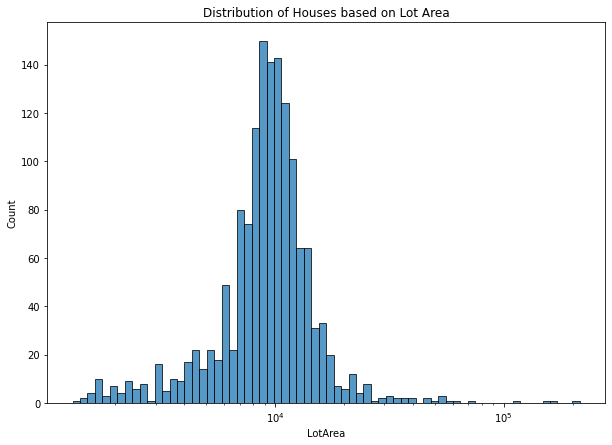

In [34]:
# As Lotfrontage refers to length of lot facing maing road,
# it should generally depend on area of Lot.
# Displaying LotArea histogram
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(prices_df['LotArea'], log_scale=True, ax=ax)
ax.set_title(f'Distribution of Houses based on Lot Area')
plt.show()

In [35]:
# Viewing measures of LotArea column
prices_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [36]:
# Creating a new column 'LotAreaCategory' based on following Lot area values:
# < 5000 : VeryLow
# 5000 - 7500 : Low
# 7500 - 12500 : Medium
# 12500 - 15000 : High
# > 15000 : VeryHigh

prices_df['LotAreaCategory']=pd.cut(prices_df['LotArea'], bins=[0, 5000, 7500, 12500, 15000, 300000], labels=['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh'])

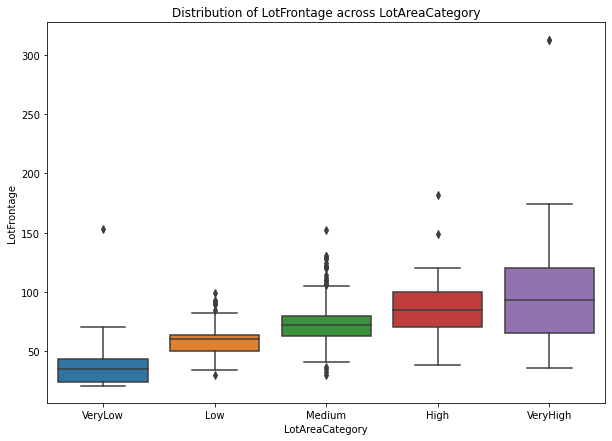

In [37]:
# visualizing LotFrontage across different Lot area categories
col='LotAreaCategory'
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=prices_df, x=col, y='LotFrontage', ax=ax )
ax.set_title(f'Distribution of LotFrontage across {col}')
plt.show()

In [38]:
# Determining median of LotFrontage across different Lot area catgeories
prices_df.groupby('LotAreaCategory')['LotFrontage'].median()

LotAreaCategory
VeryLow     35.0
Low         60.0
Medium      72.0
High        85.0
VeryHigh    93.0
Name: LotFrontage, dtype: float64

In [39]:
# Replacing LotFrontage null values with corresponding lot area category meadin values
cond1 = (prices_df['LotFrontage'].isna()) & (prices_df['LotAreaCategory']=='VeryLow')
cond2 = (prices_df['LotFrontage'].isna()) & (prices_df['LotAreaCategory']=='Low')
cond3 = (prices_df['LotFrontage'].isna()) & (prices_df['LotAreaCategory']=='Medium')
cond4 = (prices_df['LotFrontage'].isna()) & (prices_df['LotAreaCategory']=='High')
cond5 = (prices_df['LotFrontage'].isna()) & (prices_df['LotAreaCategory']=='VeryHigh')

prices_df.loc[cond1, 'LotFrontage'] = 35.0
prices_df.loc[cond2, 'LotFrontage'] = 60.0
prices_df.loc[cond3, 'LotFrontage'] = 72.0
prices_df.loc[cond4, 'LotFrontage'] = 85.0
prices_df.loc[cond5, 'LotFrontage'] = 93.0

In [40]:
# Verifying if any null values are present in 'LotFrontage'
prices_df['LotFrontage'].isna().sum()

0

In [42]:
# Determinig number of missing values and their percentage
missing_count_df = (prices_df=='NA').sum()
missing_count_df = missing_count_df.loc[missing_count_df>0].to_frame(name='MissingCount')
missing_count_df['MissingPerct'] = round((missing_count_df['MissingCount']/nrows)*100, 4)
missing_count_df

,MissingCount,MissingPerct


### Deriving new columns

In [48]:
# Determine the age of house when it is sold
prices_df['HouseAge'] = prices_df['YrSold'] - prices_df['YearBuilt']

In [49]:
# Checking a house has remodeled or not
prices_df['isRemodelled']=prices_df.apply(lambda row: 0 if (row['YearRemodAdd']==row['YearBuilt']) and (row['YearRemodAdd']<=row['YrSold']) else 1, axis=1)

In [50]:
# Determining the Garage age when it is sold
cond = prices_df['GarageYrBlt'] == '-1'
prices_df.loc[cond, 'GarageAge'] = -1
prices_df.loc[~cond, 'GarageAge'] = prices_df.loc[~cond, 'YrSold'] - prices_df.loc[~cond, 'GarageYrBlt'].astype(int)

### Dropping columns

In [51]:
prices_df = prices_df.drop(columns=['YearBuilt', 'GarageYrBlt', 'YearRemodAdd'])
prices_df.shape

(1460, 81)

### Converting columns to respective data types

In [53]:
num_to_catg_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                    'BsmtHalfBath', 'FullBath', 'HalfBath',  'BedroomAbvGr',
                    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                    'MoSold', 'YrSold'
                    ]

prices_df[num_to_catg_cols]=prices_df[num_to_catg_cols].astype('object')

## <a name="data_analysis">Data Analysis</a>

In [54]:
# Viewing distribution of various numeric variables
prices_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,70.458904,22.968264,21.0,60.00,71.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


### Visualizing distribution of Target Variable: SalePrice

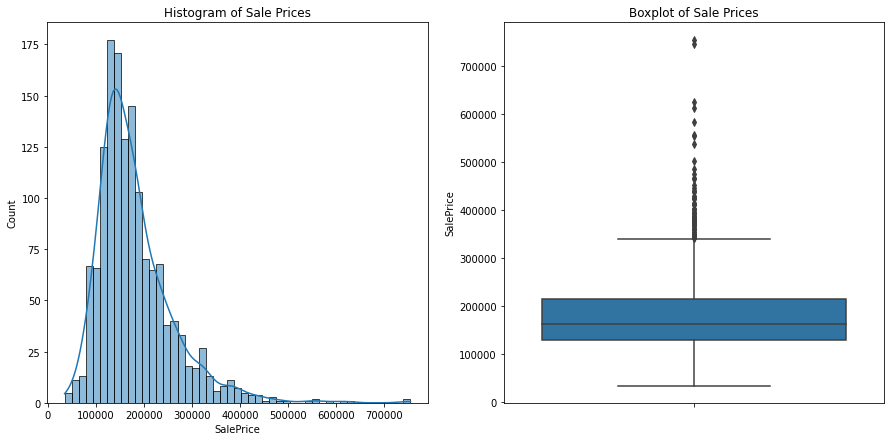

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(prices_df['SalePrice'], ax=axs[0], kde=True)
axs[0].set_title('Histogram of Sale Prices')
sns.boxplot(data=prices_df, y='SalePrice', ax=axs[1])
axs[1].set_title('Boxplot of Sale Prices')
plt.show()

#### Observations
- Distribution of Sale prices is left skewed and see houses with extreme high sale prices.

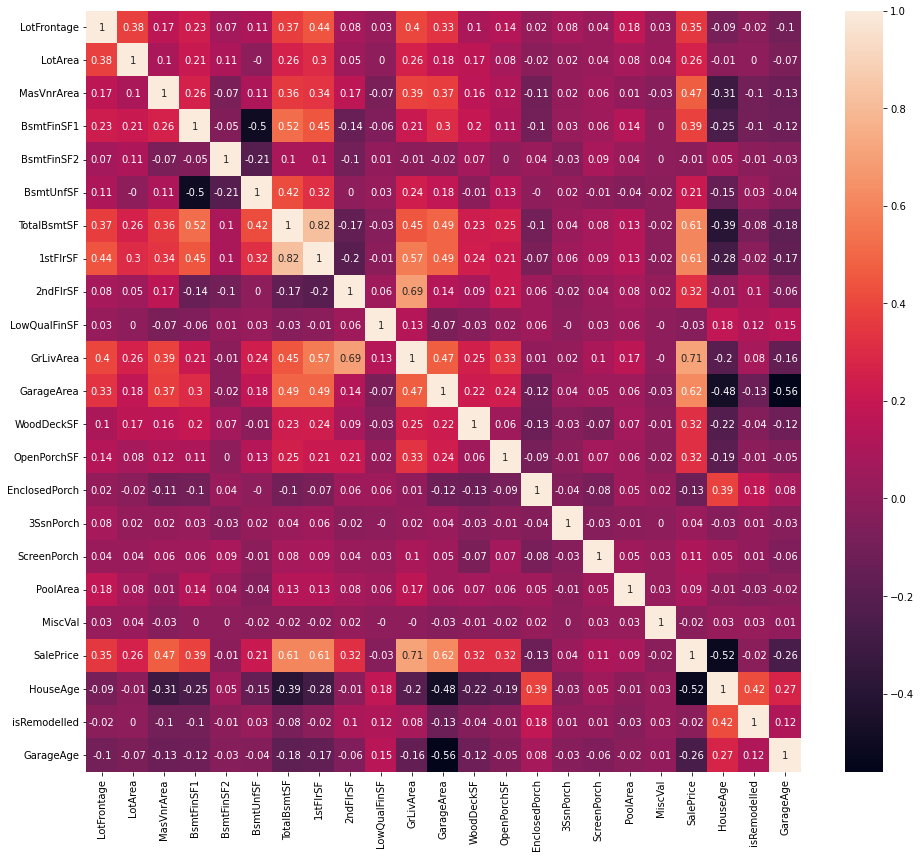

In [58]:
corr_df = prices_df.corr()
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr_df.round(2), annot=True, ax=ax)
plt.show()

### Creating Dummy Variables

In [59]:
# Converting binary variables: Street and CentralAir into 1's and 0's
prices_df['Street']=prices_df['Street'].map({'Pave':1, 'Grvl':0})
prices_df['CentralAir']=prices_df['CentralAir'].map({'Y':1, 'N':0})

In [60]:
prices_df_catg = prices_df.select_dtypes(include=['O', 'category'])
prices_df_catg.shape

(1460, 56)

In [61]:
prices_df_catg.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'LotAreaCategory'],
      dtype='object')

In [62]:
prices_df_catg_dummies=pd.get_dummies(prices_df_catg, drop_first=True)

In [63]:
prices_df = prices_df.drop(prices_df_catg.columns, axis=1)

In [64]:
prices_df = pd.concat([prices_df, prices_df_catg_dummies], axis=1)
prices_df.shape

(1460, 334)

In [65]:
prices_df.head()

,LotFrontage,LotArea,Street,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotAreaCategory_Low,LotAreaCategory_Medium,LotAreaCategory_High,LotAreaCategory_VeryHigh
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,1,196.0,706,0,150,856,1,856,...,1,0,0,0,1,0,0,1,0,0
2,80.0,9600,1,0.0,978,0,284,1262,1,1262,...,1,0,0,0,1,0,0,1,0,0
3,68.0,11250,1,162.0,486,0,434,920,1,920,...,1,0,0,0,1,0,0,1,0,0
4,60.0,9550,1,0.0,216,0,540,756,1,961,...,1,0,0,0,0,0,0,1,0,0
5,84.0,14260,1,350.0,655,0,490,1145,1,1145,...,1,0,0,0,1,0,0,0,1,0


## <a name="data_prep">Data Preparation</a>

In [66]:
# Creating X and y variables
X=prices_df.drop(columns=['SalePrice'])
y=prices_df['SalePrice']

In [67]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.9,
                                                    test_size = 0.1, random_state=100)

## <a name="build_model">Model Building</a>

### Scaling data of features

In [68]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building a Lasso Model

In [69]:
lasso1 = Lasso()
lasso1.fit(X_train, y_train)

y_train_pred = lasso1.predict(X_train)
print(r2_score(y_train, y_train_pred), mean_absolute_error(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred))
print(f'Train Set R2 Score : {r2_score(y_train, y_train_pred)}')
print(f'Train Set Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}')

y_test_pred = lasso1.predict(X_test)
print(f'Test Set R2 Score : {r2_score(y_test, y_test_pred)}')
print(f'Test Set Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}')

0.9449671475879199 12104.548851738718 350163729.8366638
Train Set R2 Score : 0.9449671475879199
Train Set Mean Absolute Error: 12104.548851738718
Test Set R2 Score : 0.8044136084516715
Test Set Mean Absolute Error: 19232.912591858283


### Performing Cross-validation of Lasso Model

In [70]:
# list of alphas to tune
a1=np.array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 
             0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
             0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
             2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0])
a2=np.linspace(10, 1000, 100)

params={'alpha':np.concatenate((a1, a2))}


# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 5.0e-03, 6.0e-03, 7.0e-03,
       8.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02, 4.0e-02, 5.0e-02,
       6.0e-02, 7.0e-02, 8.0e-02, 9.0e-02, 1.0e-01, 2.0e-01, 3.0e-01,
       4.0e-01, 5.0e-01, 6.0e-01, 7.0e-01, 8.0e-01, 9.0e-01, 1.0e+00,
       2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00, 6.0e+00, 7.0e+00, 9.0e+00,
       1.0e+01...
       6.4e+02, 6.5e+02, 6.6e+02, 6.7e+02, 6.8e+02, 6.9e+02, 7.0e+02,
       7.1e+02, 7.2e+02, 7.3e+02, 7.4e+02, 7.5e+02, 7.6e+02, 7.7e+02,
       7.8e+02, 7.9e+02, 8.0e+02, 8.1e+02, 8.2e+02, 8.3e+02, 8.4e+02,
       8.5e+02, 8.6e+02, 8.7e+02, 8.8e+02, 8.9e+02, 9.0e+02, 9.1e+02,
       9.2e+02, 9.3e+02, 9.4e+02, 9.5e+02, 9.6e+02, 9.7e+02, 9.8e+02,
       9.9e+02, 1.0e+03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.314945,0.019361,0.001646,0.001060,0.001,{'alpha': 0.001},-21232.523858,-18772.992871,-18563.764227,-21887.447771,...,-19758.768145,1491.584815,135,-10787.818845,-11744.031576,-12167.890116,-11639.860616,-11832.230665,-11634.366363,458.802184
1,0.511414,0.102769,0.001638,0.000602,0.002,{'alpha': 0.002},-21232.553817,-18772.929014,-18563.737139,-21887.501366,...,-19758.751678,1491.633100,134,-10787.816424,-11744.034914,-12167.884657,-11639.860893,-11832.226999,-11634.364777,458.801653
2,0.508260,0.068334,0.004176,0.003550,0.003,{'alpha': 0.003},-21232.583934,-18772.865165,-18563.709865,-21887.552965,...,-19758.734680,1491.680997,133,-10787.814035,-11744.038253,-12167.879259,-11639.861220,-11832.223337,-11634.363221,458.801123
3,0.624962,0.121248,0.001763,0.000690,0.004,{'alpha': 0.004},-21232.613964,-18772.801342,-18563.682423,-21887.602338,...,-19758.716926,1491.728517,132,-10787.811672,-11744.041591,-12167.873848,-11639.861549,-11832.219672,-11634.361666,458.800581
4,0.519580,0.085992,0.001584,0.000567,0.005,{'alpha': 0.005},-21232.643964,-18772.737500,-18563.655199,-21887.649512,...,-19758.698553,1491.775575,131,-10787.809309,-11744.044928,-12167.868436,-11639.861877,-11832.216005,-11634.360111,458.800039


### Visualizing Cross validation results

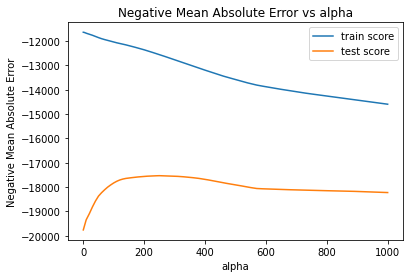

In [72]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

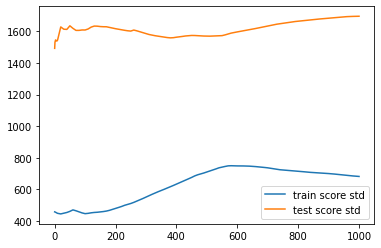

In [73]:
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['std_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['std_test_score'])
plt.legend(['train score std', 'test score std'])
plt.show()

In [74]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 250.0}
-17529.708418938455


### Building Lasso Model with best alpha

In [75]:
lasso_best = Lasso(alpha=lasso_model_cv.best_params_['alpha'])
lasso_best.fit(X_train, y_train)

train_r2_scores=[]
test_r2_scores=[]
train_maes=[]
test_maes=[]
y_train_pred = lasso_best.predict(X_train)
train_r2_scores.append(r2_score(y_train, y_train_pred))
train_maes.append(mean_absolute_error(y_train, y_train_pred))
print(f'Train Set R2 Score : {r2_score(y_train, y_train_pred)}')
print(f'Train Set Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}')

y_test_pred = lasso_best.predict(X_test)
test_r2_scores.append(r2_score(y_test, y_test_pred))
test_maes.append(mean_absolute_error(y_test, y_test_pred))
print(f'Test Set R2 Score : {r2_score(y_test, y_test_pred)}')
print(f'Test Set Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}')

Train Set R2 Score : 0.9360972360150291
Train Set Mean Absolute Error: 12942.276653823095
Test Set R2 Score : 0.755141335220182
Test Set Mean Absolute Error: 18630.461154906476


### Building a Ridge Regression Model

### Performing Cross Validation of Ridge Model

In [76]:
# list of alphas to tune
a1=np.array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 
             0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
             0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
             2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0])
a2=np.linspace(10, 1000, 100)

params={'alpha':np.concatenate((a1, a2))}

# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1)            

ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 5.0e-03, 6.0e-03, 7.0e-03,
       8.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02, 4.0e-02, 5.0e-02,
       6.0e-02, 7.0e-02, 8.0e-02, 9.0e-02, 1.0e-01, 2.0e-01, 3.0e-01,
       4.0e-01, 5.0e-01, 6.0e-01, 7.0e-01, 8.0e-01, 9.0e-01, 1.0e+00,
       2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00, 6.0e+00, 7.0e+00, 9.0e+00,
       1.0e+01...
       6.4e+02, 6.5e+02, 6.6e+02, 6.7e+02, 6.8e+02, 6.9e+02, 7.0e+02,
       7.1e+02, 7.2e+02, 7.3e+02, 7.4e+02, 7.5e+02, 7.6e+02, 7.7e+02,
       7.8e+02, 7.9e+02, 8.0e+02, 8.1e+02, 8.2e+02, 8.3e+02, 8.4e+02,
       8.5e+02, 8.6e+02, 8.7e+02, 8.8e+02, 8.9e+02, 9.0e+02, 9.1e+02,
       9.2e+02, 9.3e+02, 9.4e+02, 9.5e+02, 9.6e+02, 9.7e+02, 9.8e+02,
       9.9e+02, 1.0e+03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015819,0.000638,0.001148,0.000154,0.001,{'alpha': 0.001},-19089.415075,-19120.727882,-18542.392419,-20569.524651,...,-19148.467668,764.362035,118,-10655.110841,-11756.114022,-12167.061036,-11564.243059,-11604.233896,-11549.352571,495.422245
1,0.018023,0.002151,0.001128,0.000029,0.002,{'alpha': 0.002},-19071.020696,-19118.603111,-18542.381369,-20540.962272,...,-19137.992354,754.688855,117,-10655.786571,-11755.955776,-12167.044268,-11564.564731,-11606.090919,-11549.888453,495.204468
2,0.015757,0.000407,0.001105,0.000047,0.003,{'alpha': 0.003},-19052.874557,-19116.489672,-18542.370306,-20513.097844,...,-19127.719313,745.300865,115,-10656.452947,-11755.798871,-12167.027480,-11564.880532,-11607.946626,-11550.421291,494.991066
3,0.015945,0.000597,0.001137,0.000085,0.004,{'alpha': 0.004},-19034.971519,-19114.387466,-18542.359230,-20485.906057,...,-19117.681794,736.150668,114,-10657.110160,-11755.643294,-12167.010672,-11565.187913,-11609.750284,-11550.940465,494.780749
4,0.017171,0.003599,0.001143,0.000128,0.005,{'alpha': 0.005},-19017.306580,-19112.296395,-18542.348140,-20459.362807,...,-19107.831333,727.269862,112,-10657.758400,-11755.489032,-12166.993845,-11565.487170,-11611.589608,-11551.463611,494.575503


### Visualizing Cross Validation results

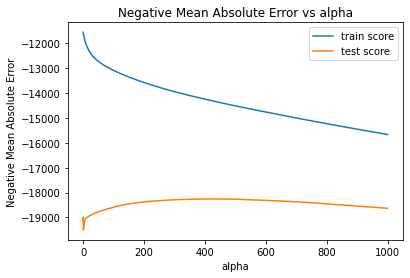

In [78]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

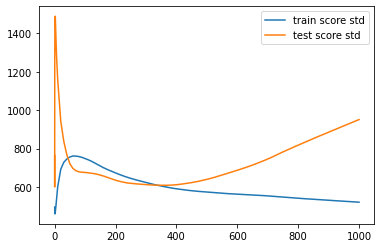

In [79]:
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['std_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['std_test_score'])
plt.legend(['train score std', 'test score std'])
plt.show()

In [80]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 430.0}
-18260.43241704988


### Building Ridge Model with best alpha

In [81]:
ridge_best = Ridge(alpha=ridge_model_cv.best_params_['alpha'])
ridge_best.fit(X_train, y_train)

y_train_pred = ridge_best.predict(X_train)
train_r2_scores.append(r2_score(y_train, y_train_pred))
train_maes.append(mean_absolute_error(y_train, y_train_pred))
print(f'Train Set R2 Score : {r2_score(y_train, y_train_pred)}')
print(f'Train Set Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}')

y_test_pred = ridge_best.predict(X_test)
test_r2_scores.append(r2_score(y_test, y_test_pred))
test_maes.append(mean_absolute_error(y_test, y_test_pred))
print(f'Test Set R2 Score : {r2_score(y_test, y_test_pred)}')
print(f'Test Set Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}')

Train Set R2 Score : 0.9145991064203657
Train Set Mean Absolute Error: 14565.562859939595
Test Set R2 Score : 0.8649998884124852
Test Set Mean Absolute Error: 17046.066497742326


### Choosing the best model

In [82]:
models_df = pd.DataFrame()
models_df['Model']=['Best Lasso Model', 'Best Ridge Model']
models_df['Mean_train_r2_score']=train_r2_scores
models_df['Mean_train_mae_score']=train_maes
models_df['Mean_test_r2_score']=test_r2_scores 
models_df['Mean_test_mae_score']=test_maes
models_df

,Model,Mean_train_r2_score,Mean_train_mae_score,Mean_test_r2_score,Mean_test_mae_score
0,Best Lasso Model,0.936097,12942.276654,0.755141,18630.461155
1,Best Ridge Model,0.914599,14565.562860,0.865000,17046.066498


In [83]:
lasso_cv_results.loc[lasso_cv_results['param_alpha']==250, ['std_train_score', 'std_test_score']]

,std_train_score,std_test_score
59,511.53322,1600.720115


In [84]:
ridge_cv_results.loc[ridge_cv_results['param_alpha']==430, ['std_train_score', 'std_test_score']]

,std_train_score,std_test_score
77,584.364148,617.963468


## <a name="validate_model">Model Validation</a>

In [85]:
residual = y_test - y_test_pred

### Visualizing Distribution of residuals

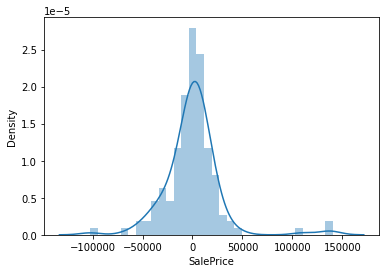

In [86]:
# checking if the residuals are distributed normally
sns.distplot(residual)
plt.show()

- Residuals appear to be normally distributed

### Visualizing Q-Q plot

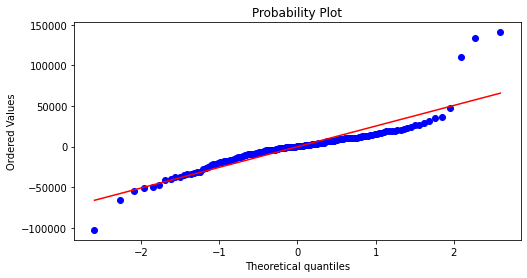

In [87]:
# Visualing Q-Q plot of residuals
import scipy as sp
fig, ax = plt.subplots(figsize=(8,4))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

- The Blue dots almost align on the red line except in the corners

### Visualizing Residual plot

Text(0, 0.5, 'Residuals')

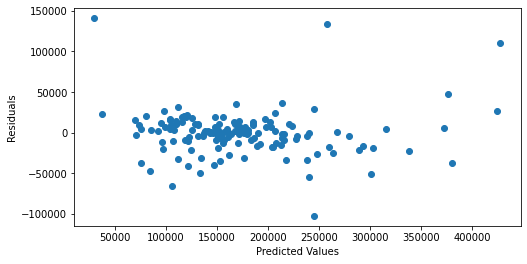

In [88]:
# Visualing Residual analysis plot
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(y_test_pred, residual)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')

- Resiudals speard on both sides of 0. No specific pattern is found

### Visualizing Auto correlations

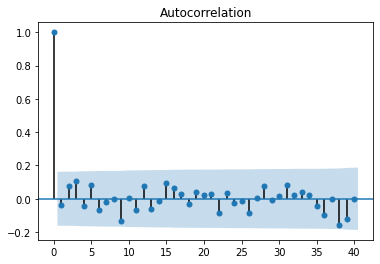

In [89]:
# Visualizing Auto correlations across residuals
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

- No Autocorrelations found

In [90]:
X.columns[np.argsort(np.abs(ridge_best.coef_))[-5:]].tolist()

['1stFlrSF', 'PoolQC_Gd', 'OverallQual_10', 'GrLivArea', 'OverallQual_9']